In [1]:
##Revannath Jondhale ## Cocacola Sales Forecasting

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from datetime import datetime,time

In [7]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [8]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [9]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [11]:
# Creating the list with the name of quarters

In [12]:
quarters = ['q1','q2','q3','q4']

In [13]:
# Making a variable to store the qarter count

In [14]:
p = cocacola["Quarter"][0]

In [15]:
p[0:5]

'Q1_86'

In [16]:
# Making a column in the cocacola dataframe to store the name of the quarter without year count.

In [17]:
cocacola['quarters'] = 0

In [19]:
for i in range(42):
  p = cocacola["Quarter"][i]
  cocacola['quarters'][i] = p[0:2]
cocacola.head()

<ipython-input-19-1cb440c8d4c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['quarters'][i] = p[0:2]


,Quarter,Sales,quarters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [20]:
cocacola["years"] = 0
for i in range(42):
  p = cocacola["Quarter"][i]
  cocacola["years"][i] = p[3:5]
cocacola.head()

<ipython-input-20-566f311c839c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola["years"][i] = p[3:5]


,Quarter,Sales,quarters,years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [21]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cocacola['quarters']))

In [22]:
quarter_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [23]:
cocacola1 = pd.concat([cocacola,quarter_dummies],axis = 1)

In [24]:
cocacola1.head()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


<AxesSubplot:>

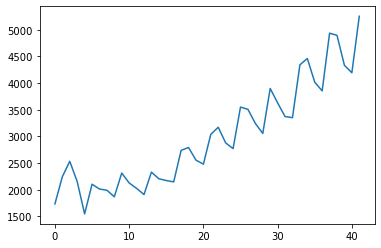

In [25]:
cocacola.Sales.plot()

In [26]:
heatmap_y_quarters = pd.pivot_table(data = cocacola, values = "Sales", index = "years", columns = "quarters",aggfunc = 'mean',fill_value = 0)

<AxesSubplot:xlabel='quarters', ylabel='years'>

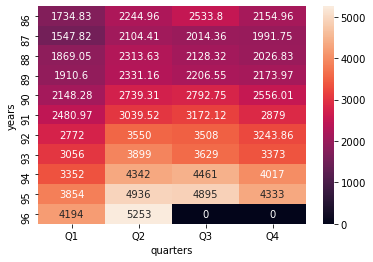

In [27]:
sns.heatmap(heatmap_y_quarters,annot = True, fmt = "g")

In [28]:
cocacola.head()

,Quarter,Sales,quarters,years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


<AxesSubplot:xlabel='quarters', ylabel='Sales'>

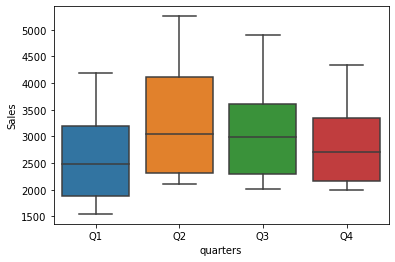

In [29]:
sns.boxplot(x = "quarters",y = "Sales",data = cocacola)


<AxesSubplot:xlabel='years', ylabel='Sales'>

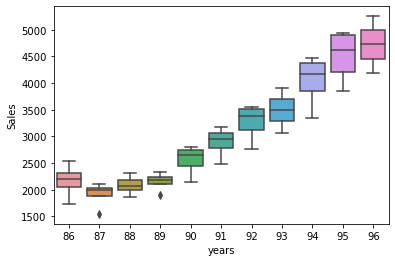

In [30]:
sns.boxplot(x = "years", y = "Sales", data = cocacola)

<AxesSubplot:xlabel='years', ylabel='Sales'>

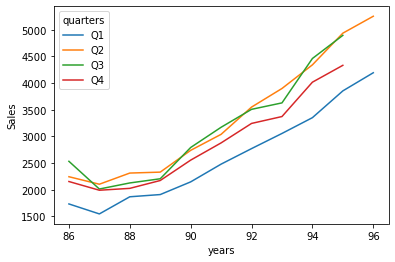

In [31]:
sns.lineplot(x = "years", y = "Sales", hue = "quarters", data = cocacola)

In [32]:
cocacola1["t"] = np.arange(1,43

SyntaxError: unexpected EOF while parsing (<ipython-input-32-2e940a0953a9>, line 1)

In [33]:
cocacola1["t"] = np.arange(1,43)

In [34]:
cocacola1["t_squared"] = cocacola1["t"]*cocacola1["t"]

In [35]:
cocacola1["log_Sales"] = np.log(cocacola1["Sales"])

In [36]:
cocacola1.head()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [37]:
train = cocacola1.head(36)

In [38]:
train.tail()

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
31,Q4_93,3373.0,Q4,93,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291


In [39]:
test = cocacola1.tail(6)

In [40]:
test

,Quarter,Sales,quarters,years,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


In [41]:
import statsmodels.formula.api as smf

In [42]:
# First model ----------- LINEAR----------------

In [43]:
linear_model = smf.ols('Sales~t', data = train).fit()

In [44]:
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))

In [45]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))

In [46]:
rmse_linear

667.4256979280378

In [48]:
 ##Second model ------------EXPONENTIAL--------------

In [49]:
exp_model = smf.ols("log_Sales~t", data = train).fit()

In [50]:
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))

In [51]:
rmse_exp = np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_exp)))**2))

In [52]:
rmse_exp

526.7672615478385

In [53]:
# Third model ----------QUADRATIC-----------

In [54]:
quad_model = smf.ols('Sales~t+t_squared',data = train).fit()

In [55]:
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))

In [56]:
rmse_quad = np.sqrt(np.mean((np.array(pred_quad)-np.array(test['Sales']))**2))

In [57]:
rmse_quad

485.14067020702515

In [58]:
# Fourth model ------------ADDITIVE SEASONALITY---------------

In [59]:
add_sea_model = smf.ols("Sales~Q1+Q2+Q3+Q4", data = train).fit()

In [60]:
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))

In [61]:
rmse_add_sea = np.sqrt(np.mean(np.array(pred_add_sea)-np.array(test['Sales']))**2)

In [62]:
rmse_add_sea

1878.7334834911205

In [63]:
# # Fifth model ---------------ADDITIVE SEASONALITY QUADRATIC--------------

In [64]:
# add_sea_quad_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4', data = train)

In [65]:
# pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(test))

In [66]:
# rmse_add_sea_quad = np.sqrt(np.mean(np.array(pred_add_sea_quad)-np.array(test['Sales']))**2)

In [67]:
# rmse_add_sea_quad

In [68]:
######## There is something wrong which I can't find the solution to so we will skip this model. ###########

In [69]:
mul_add_sea_model = smf.ols("log_Sales~t+Q1+Q2+Q3+Q4", data = train).fit()

In [70]:
pred_mul_add_sea = pd.Series(mul_add_sea_model.predict(test[['Q1','Q2','Q3','Q4','t']]))

In [71]:
rmse_mul_add_sea = np.sqrt(np.mean((np.array(np.exp(pred_mul_add_sea))-np.array(test['Sales']))**2))

In [72]:
rmse_mul_add_sea

323.21275367145705

In [73]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,"NA","NA",rmse_mul_add_sea])}

In [74]:
data

{'MODEL': 0          rmse_linear
 1             rmse_exp
 2            rmse_quad
 3         rmse_add_sea
 4    rmse_add_sea_quad
 5         rmse_mul_sea
 6     rmse_mul_add_sea
 dtype: object,
 'RMSE_Values': 0     667.425698
 1     526.767262
 2      485.14067
 3    1878.733483
 4             NA
 5             NA
 6     323.212754
 dtype: object}

In [75]:
table_rmse = pd.DataFrame(data)

In [76]:
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,667.425698
1,rmse_exp,526.767262
2,rmse_quad,485.14067
3,rmse_add_sea,1878.733483
4,rmse_add_sea_quad,NA
5,rmse_mul_sea,NA
6,rmse_mul_add_sea,323.212754
